### Data Cleaning

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import io

def clean_dataset(file_path):
    try:
        df = pd.read_csv(file_path)

        # Remove 'Unnamed' and 'Id' columns if they exist
        if 'Unnamed: 0' in df.columns:
            df = df.drop(columns=['Unnamed: 0'])
        if 'Id' in df.columns:
            df = df.drop(columns=['Id'])

        # Handle missing values for numerical columns
        numerical_cols = df.select_dtypes(include=np.number).columns
        for col in numerical_cols:
            if df[col].isnull().any():
                if col != 'SalePrice':  # Predicting SalePrice, will not impute.
                    df[col].fillna(df[col].median(), inplace=True)  # use median for numerical columns
                else:
                    # Remove rows with missing SalePrice
                    df = df.dropna(subset=['SalePrice'])

        # Handle missing values for categorical columns
        categorical_cols = df.select_dtypes(exclude=np.number).columns
        for col in categorical_cols:
            if df[col].isnull().any():
                df[col].fillna(df[col].mode()[0], inplace=True)  # use mode for categorical columns
        return df

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
file_path = "Housing Prices Dataset.csv"
cleaned_df = clean_dataset(file_path)

if cleaned_df is not None:
    print("Cleaned DataFrame:")
    print(cleaned_df.head())  # display first 5 rows of cleaned data.
    cleaned_df.to_csv('Housing_Prices_Dataset_cleaned.csv', index=False)  # save to new csv.

Cleaned DataFrame:
   LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           21     1596            4            5       1973          1973   
1           21     1890            4            7       1972          1972   
2           21     1526            4            8       1970          2002   
3           21     1491            4            6       1972          1972   
4           21     1936            4            6       1970          1970   

   MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  WoodDeckSF  OpenPorchSF  \
0           0          2          2         4  ...         120          101   
1           0          2          3         4  ...          88            0   
2           0          2          3         4  ...           0            0   
3           0          2          2         4  ...          96           24   
4           0          2          2         4  ...           0            0   

   EnclosedPorch  3SsnPorch  ScreenPo

### Descriptive

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "Housing_Prices_Dataset_cleaned.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Basic Information:")
df.info()

# Display first few rows
print("\nFirst five rows:")
print(df.head())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking for missing values
print("\nSummary Statistics:")
print(df.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   int64  
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1460 non-null   int64  
 7   ExterQual      1460 non-null   int64  
 8   ExterCond      1460 non-null   int64  
 9   BsmtQual       1460 non-null   int64  
 10  BsmtCond       1460 non-null   int64  
 11  BsmtExposure   1460 non-null   int64  
 12  BsmtFinType1   1460 non-null   int64  
 13  BsmtFinSF1     1460 non-null   int64  
 14  BsmtFinType2   1460 non-null   int64  
 15  BsmtFinSF2     1460 non-null   int64  
 16  BsmtUnfSF      1460 non-null   int64  
 17  TotalBsmtSF    1460 non-null   in

### Explorary Data Analysis

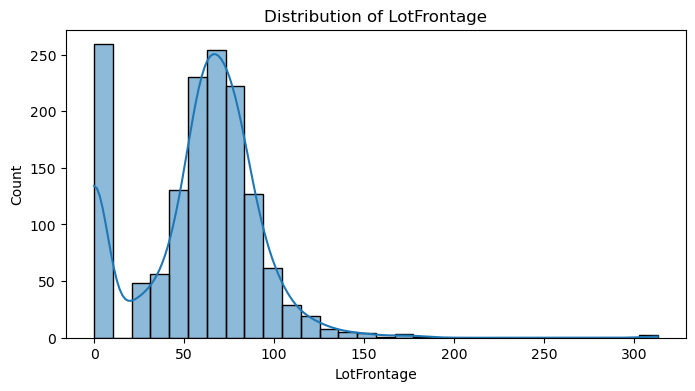

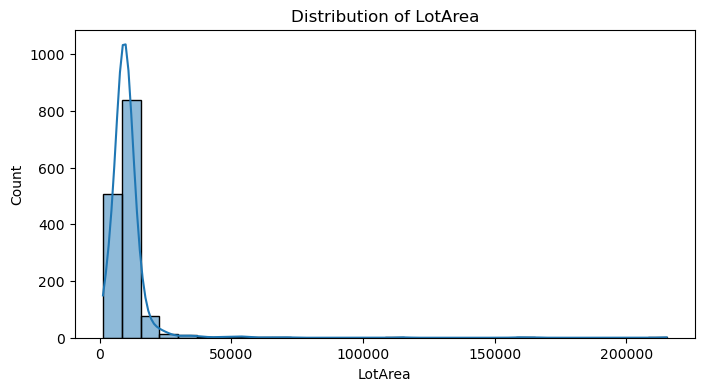

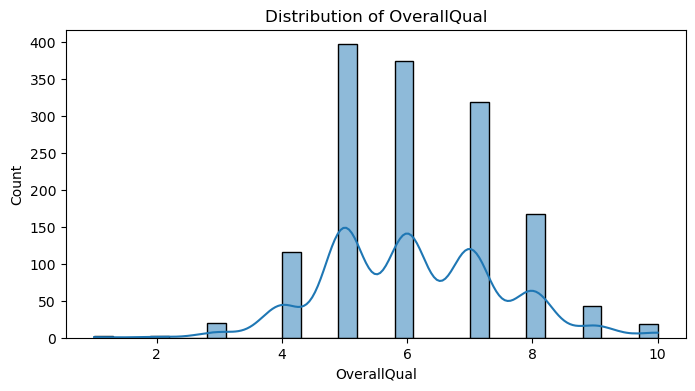

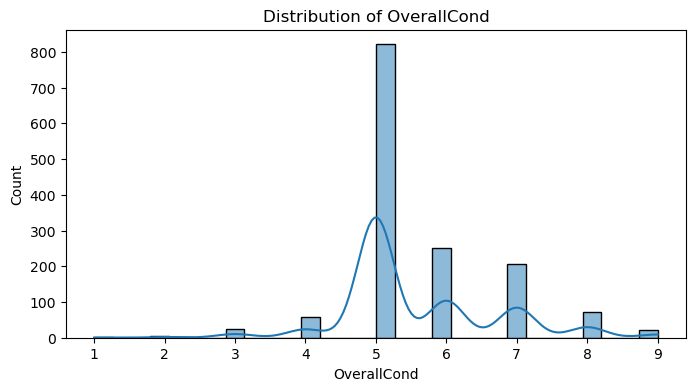

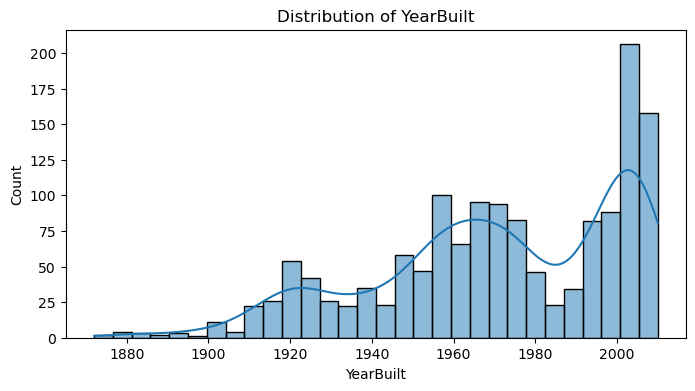

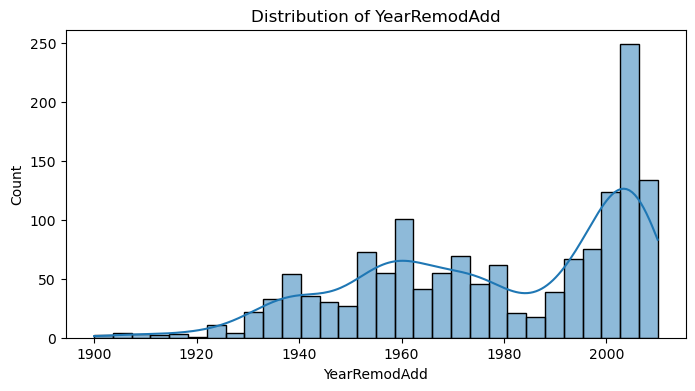

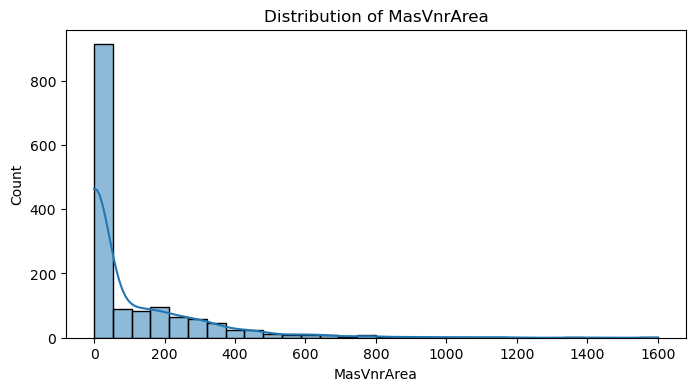

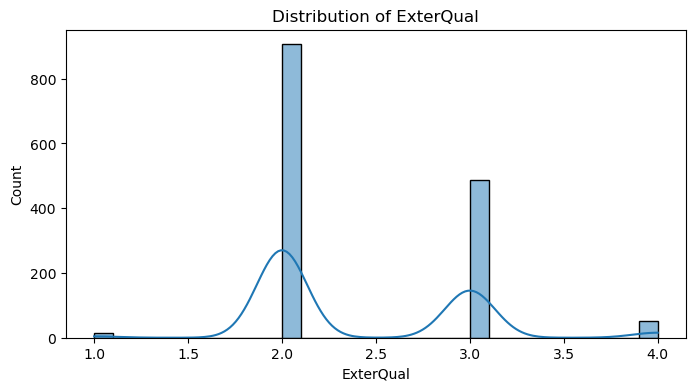

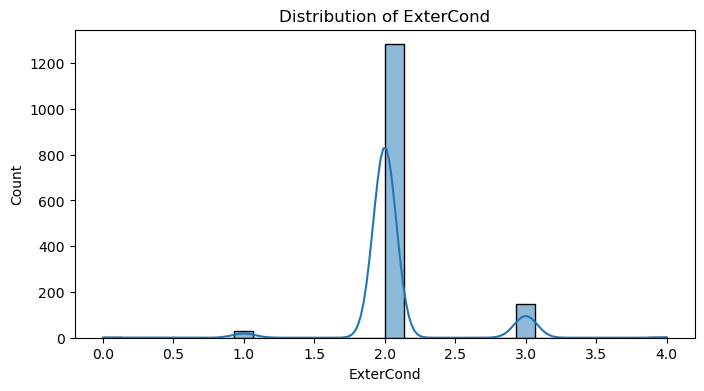

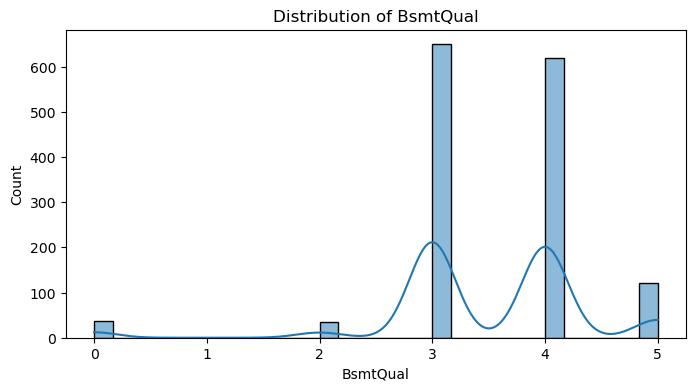

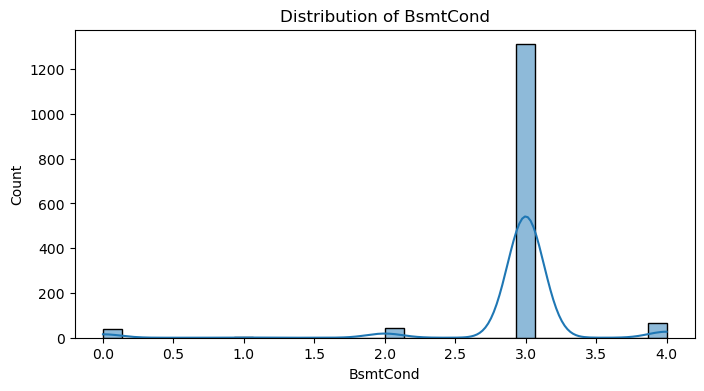

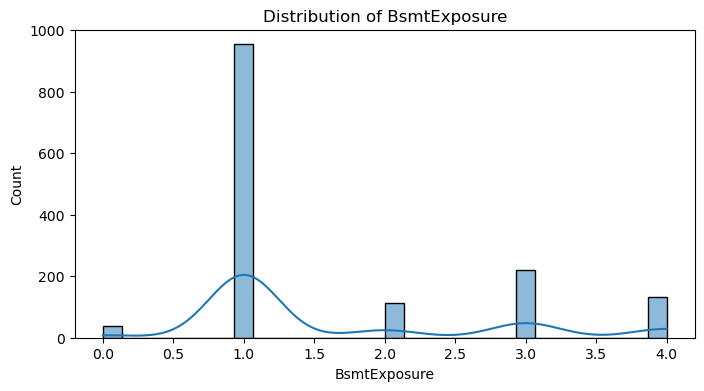

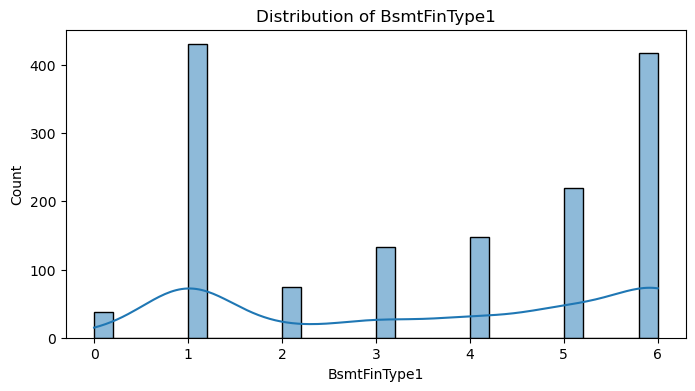

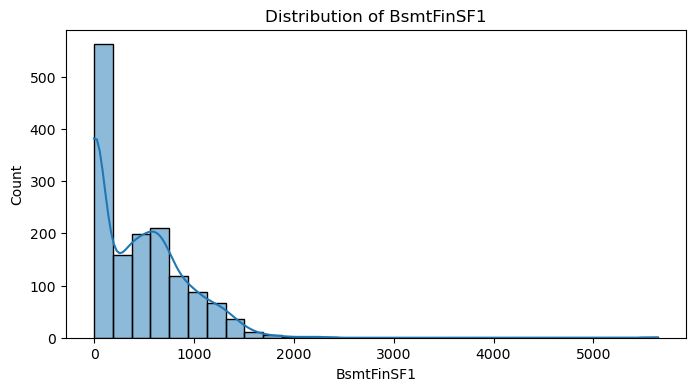

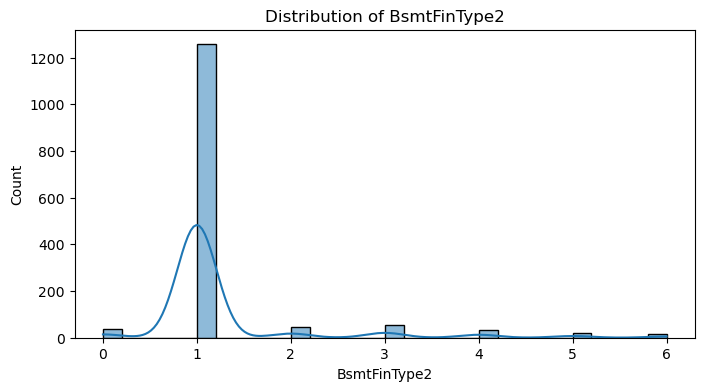

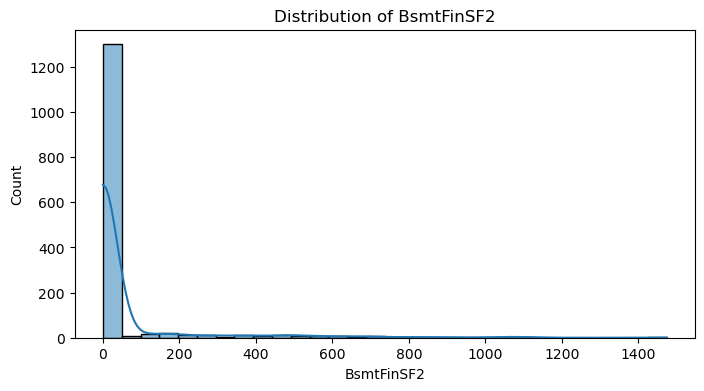

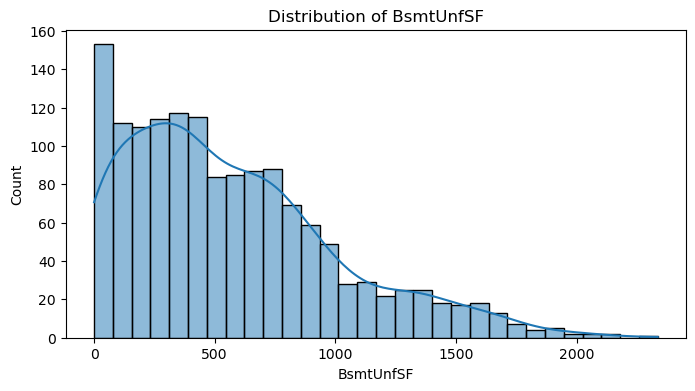

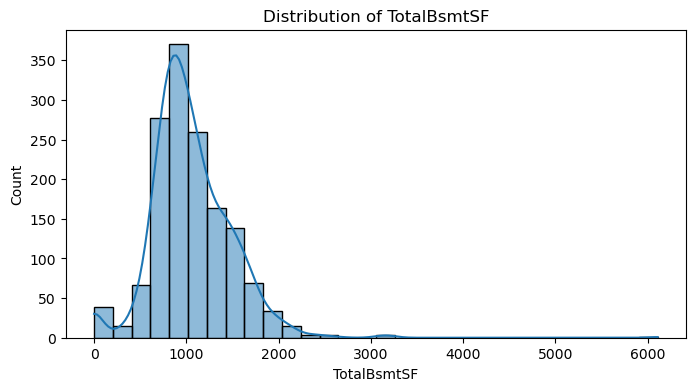

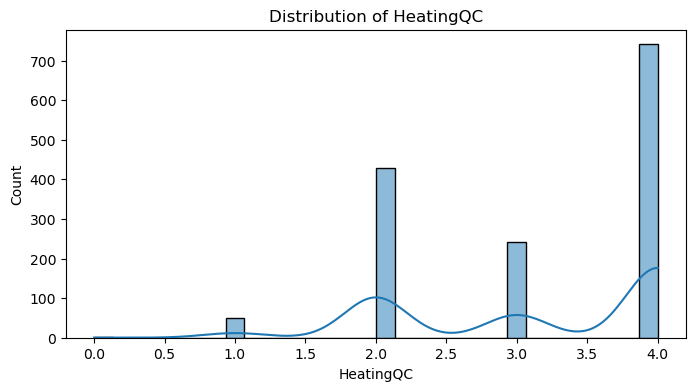

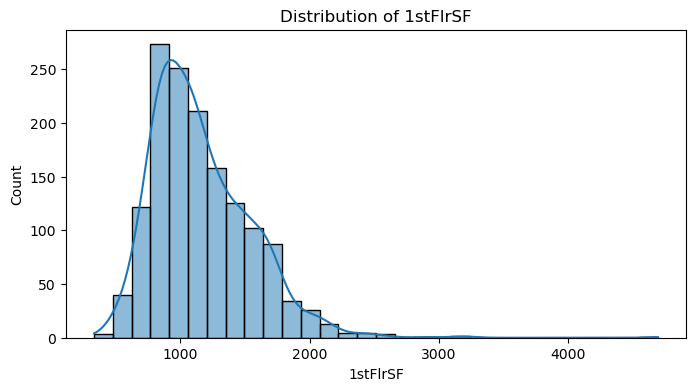

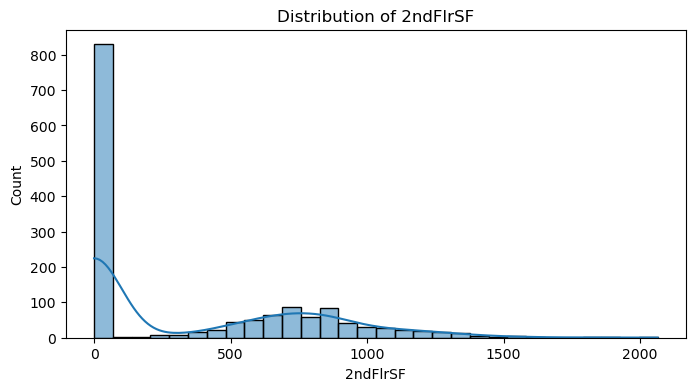

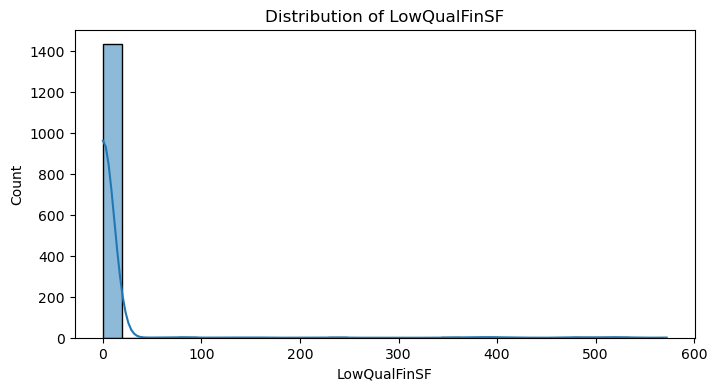

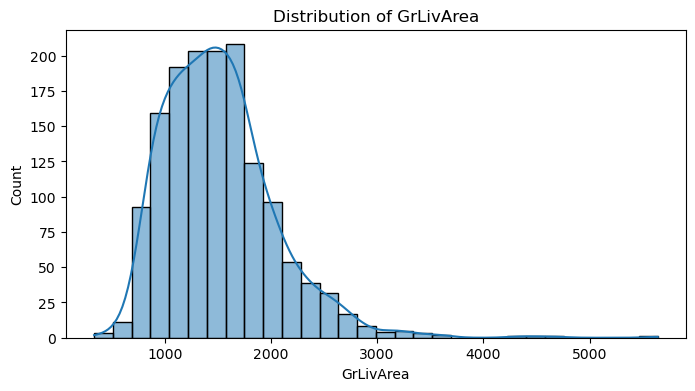

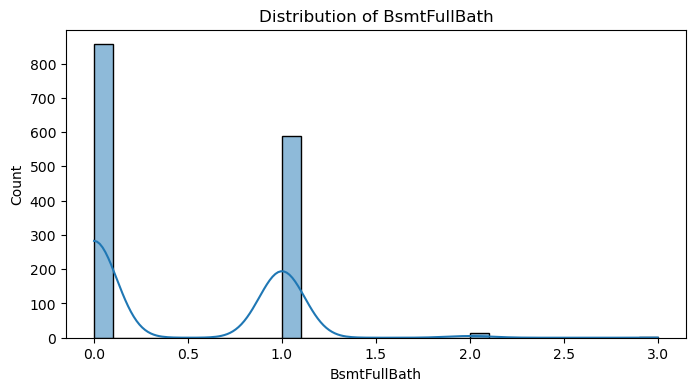

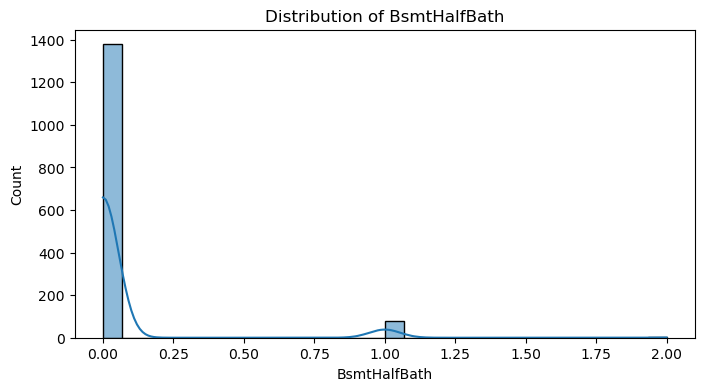

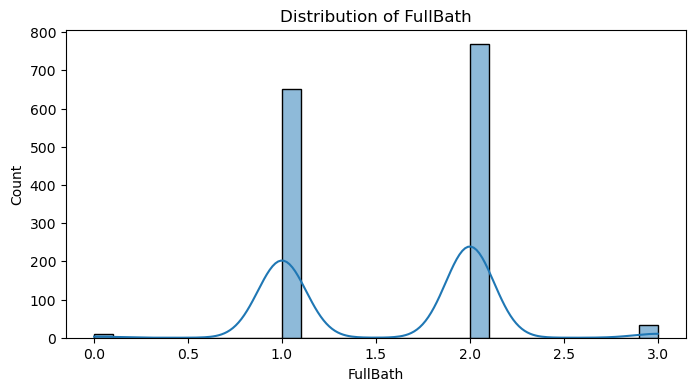

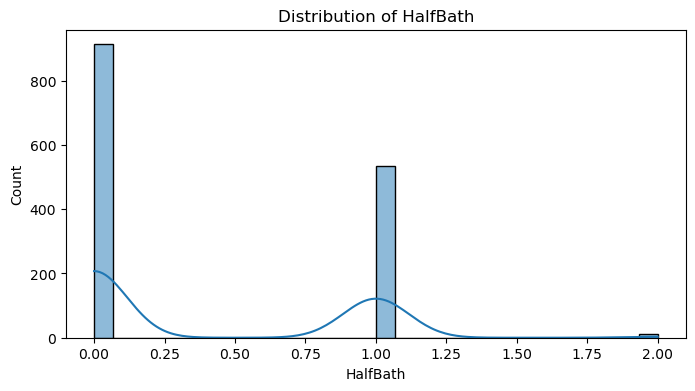

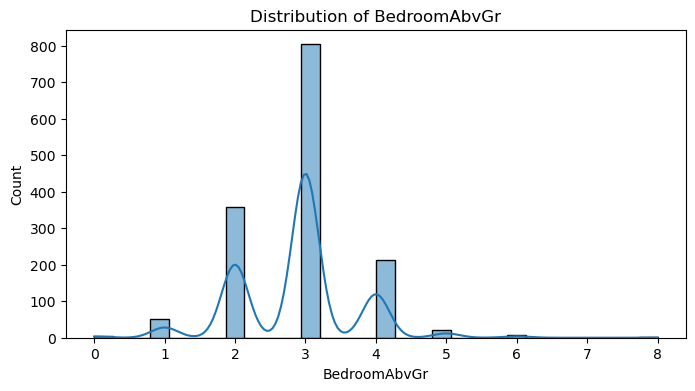

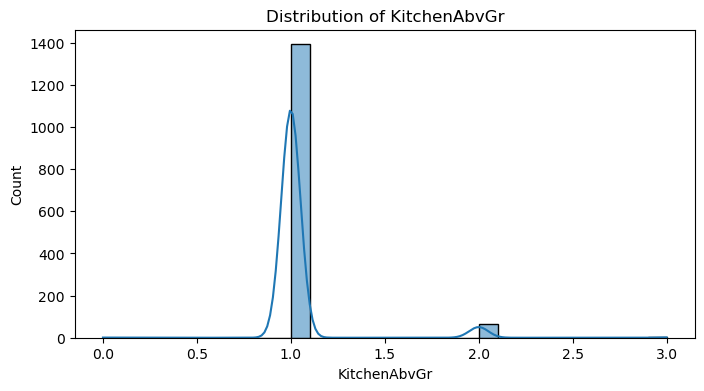

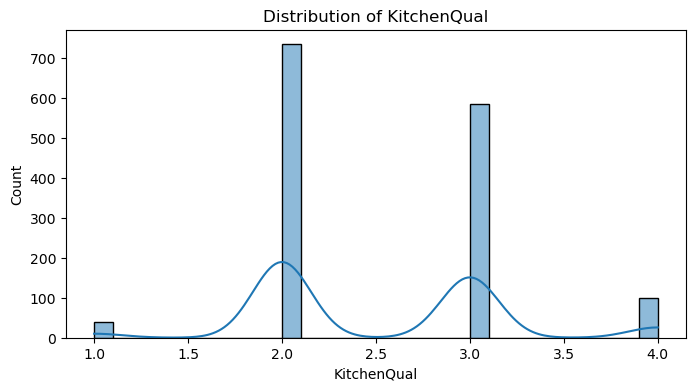

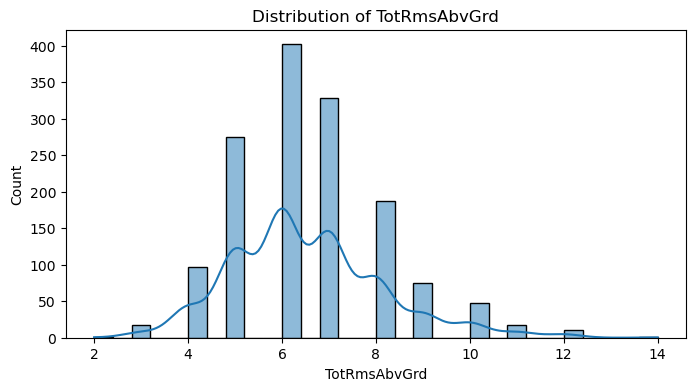

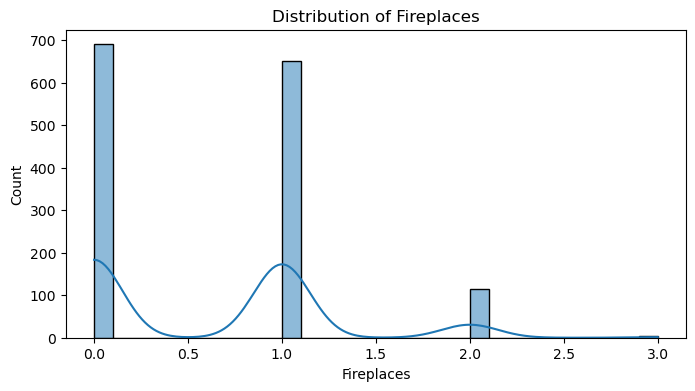

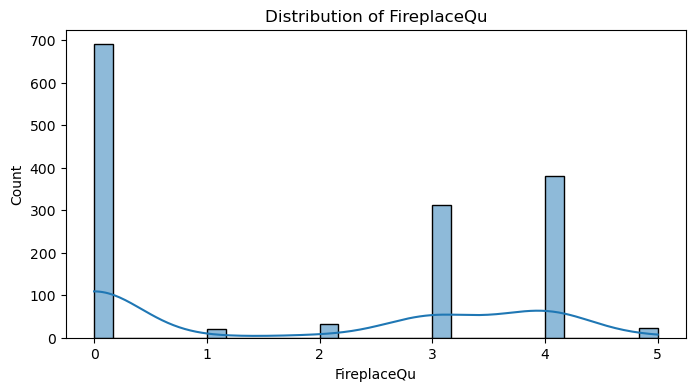

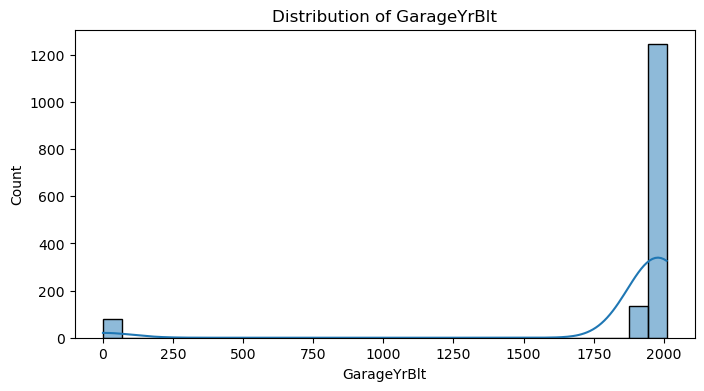

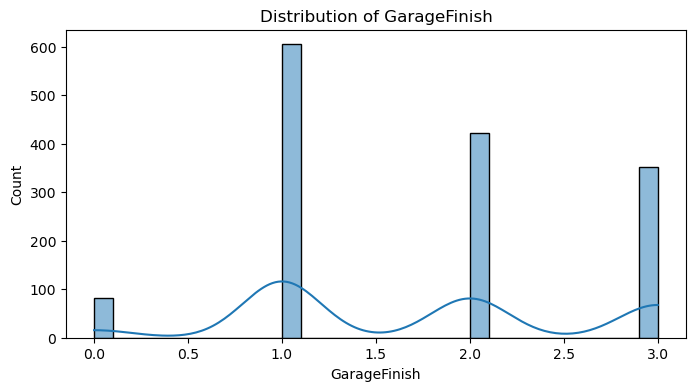

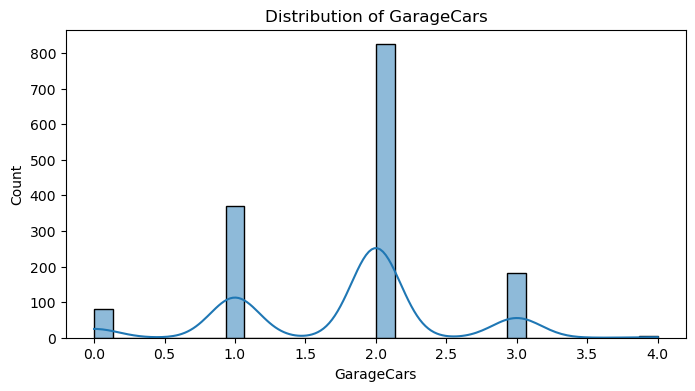

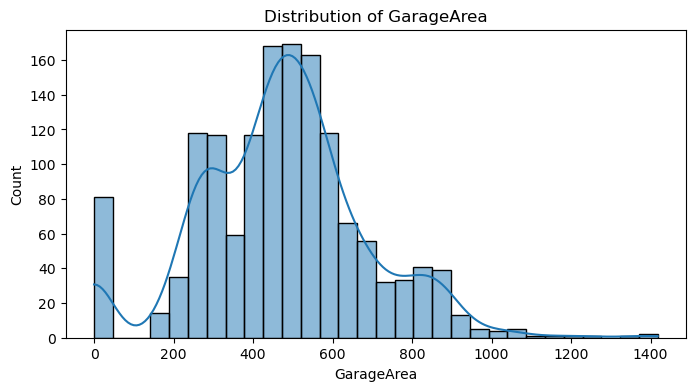

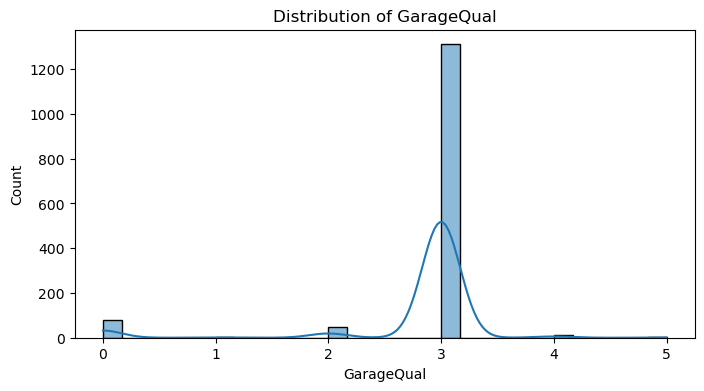

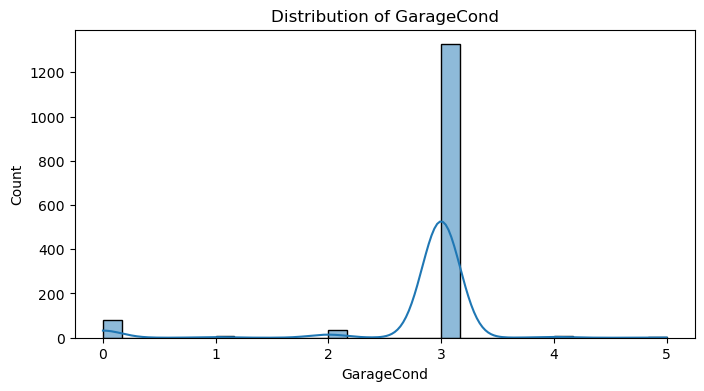

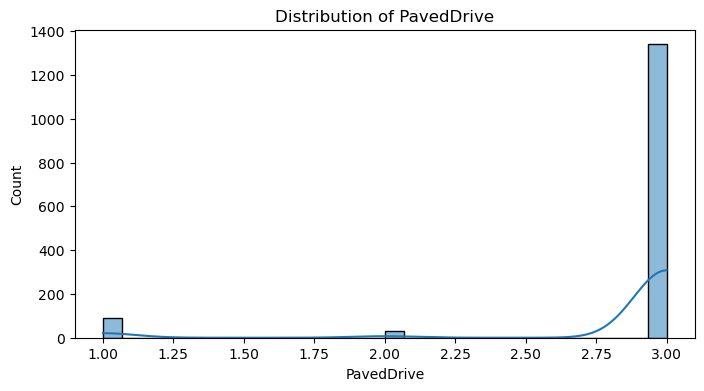

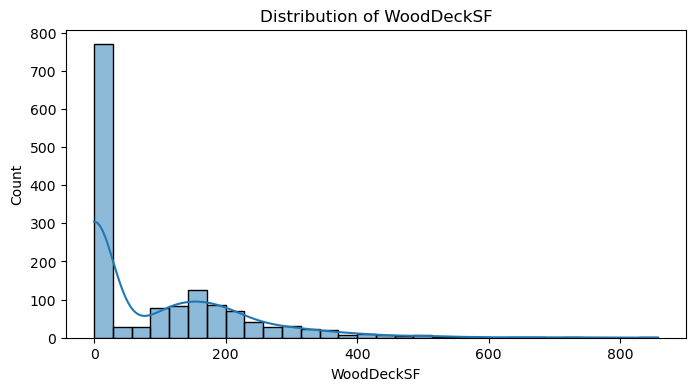

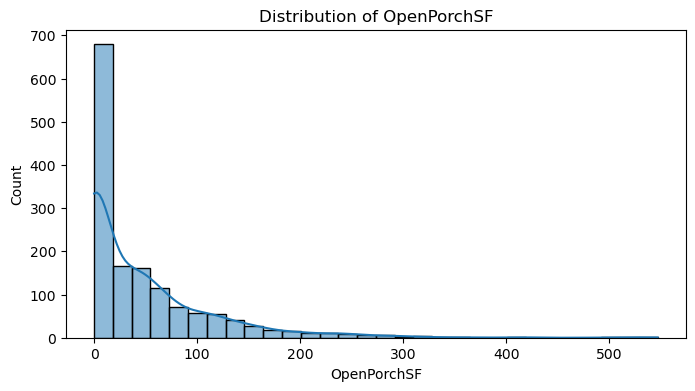

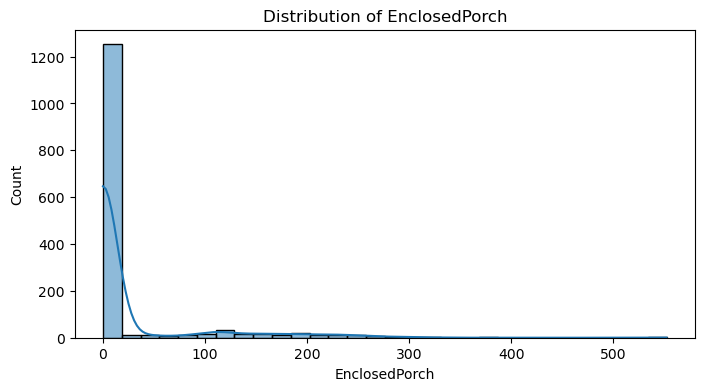

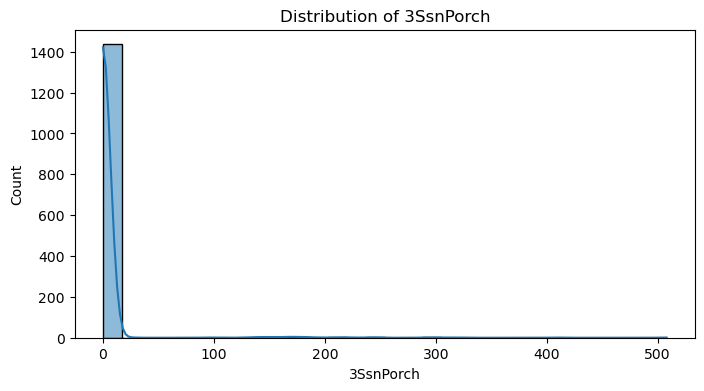

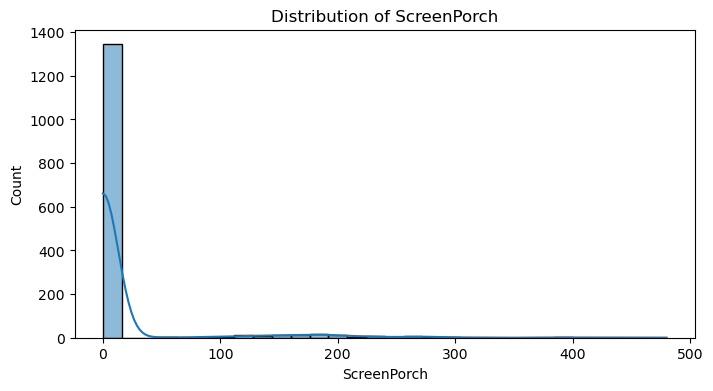

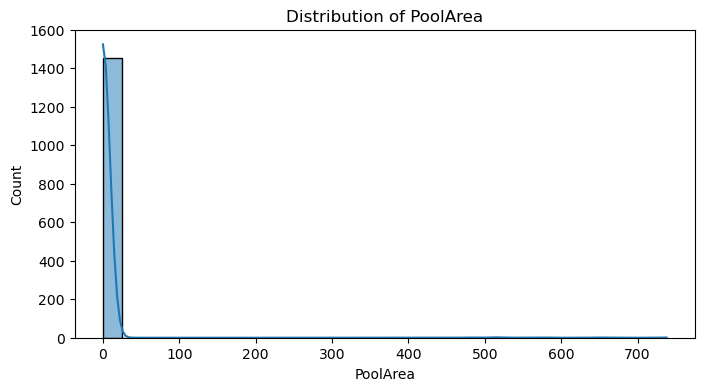

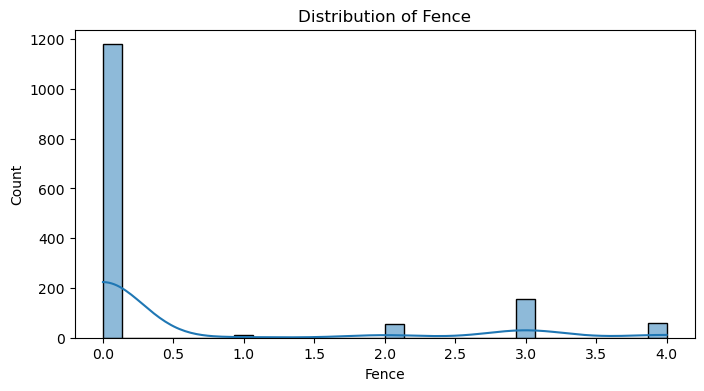

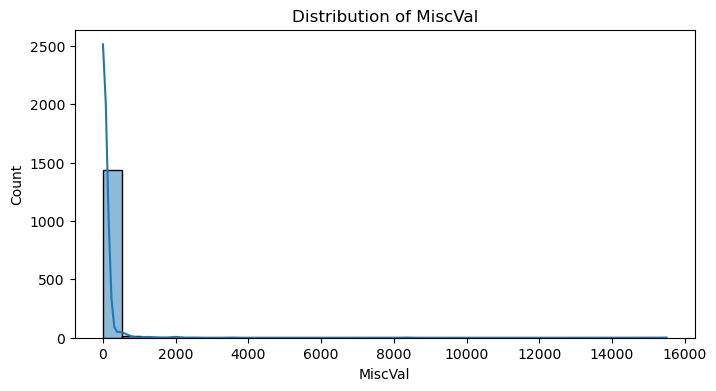

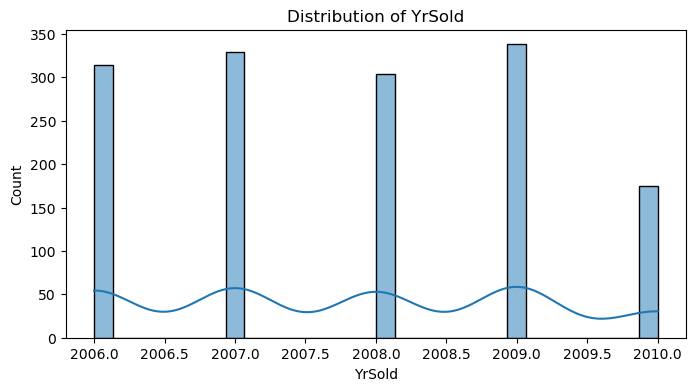

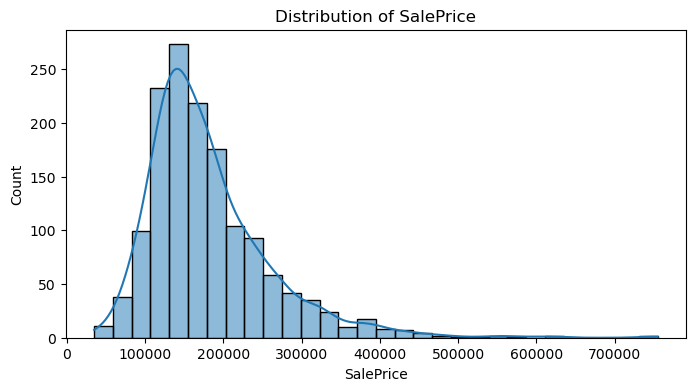

In [27]:
# Plot distribution of numerical features
num_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

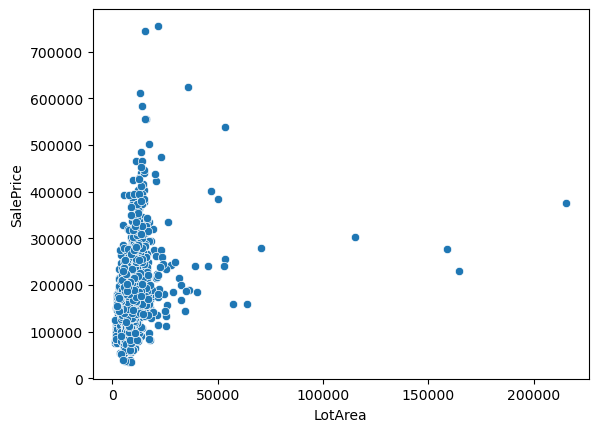

In [25]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.show()

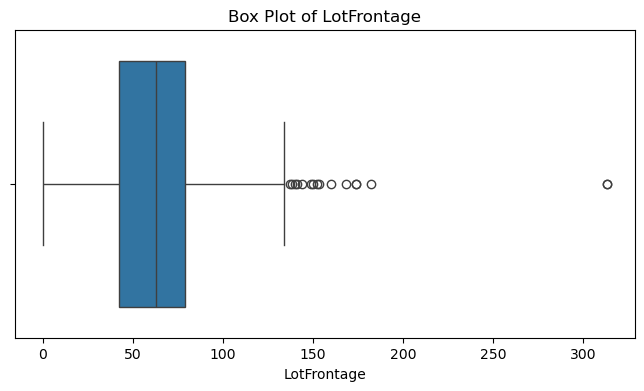

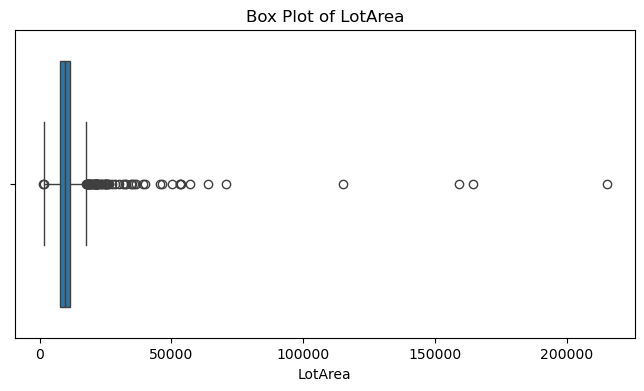

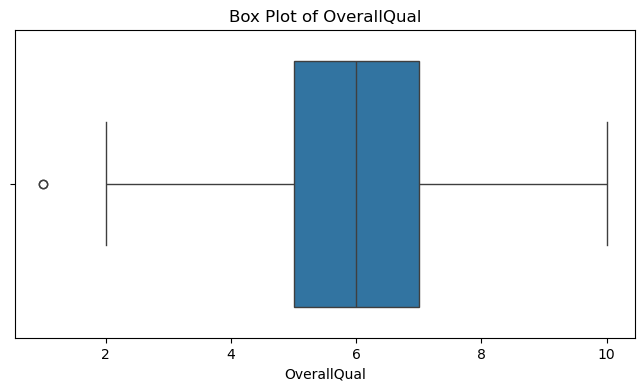

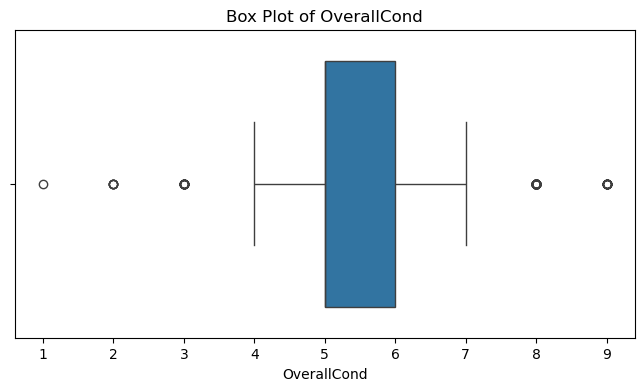

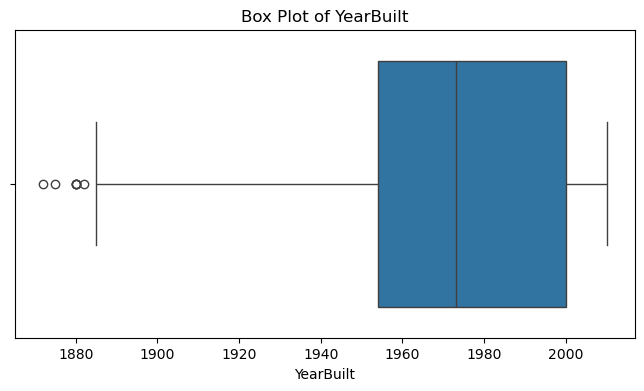

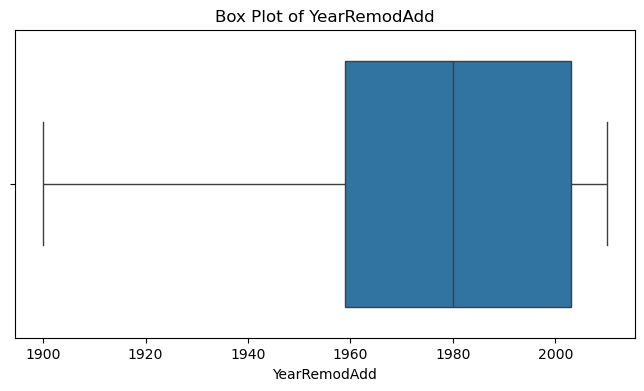

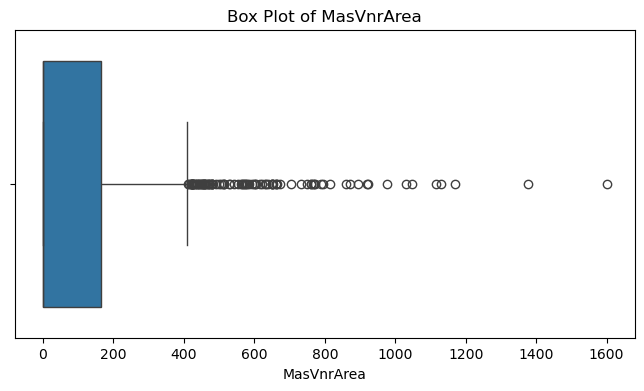

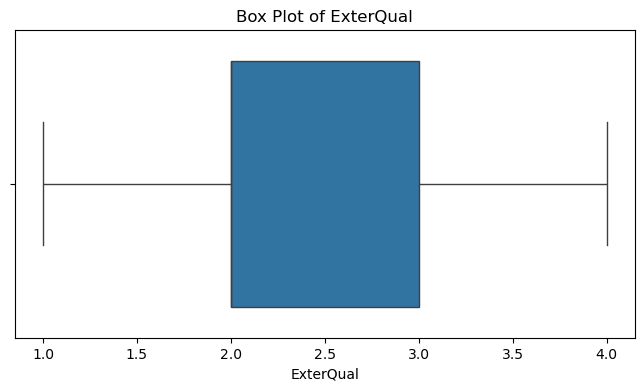

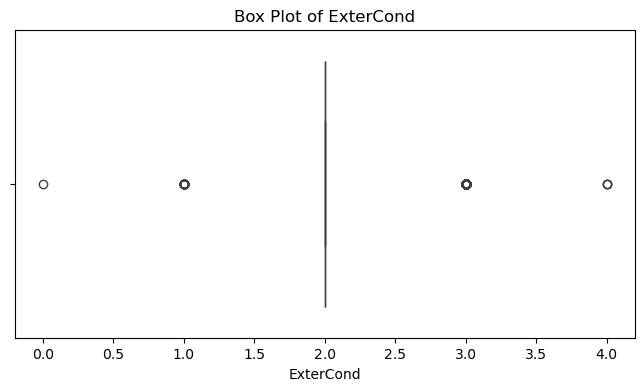

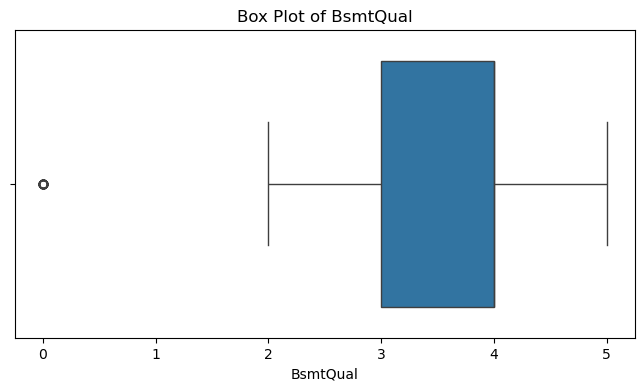

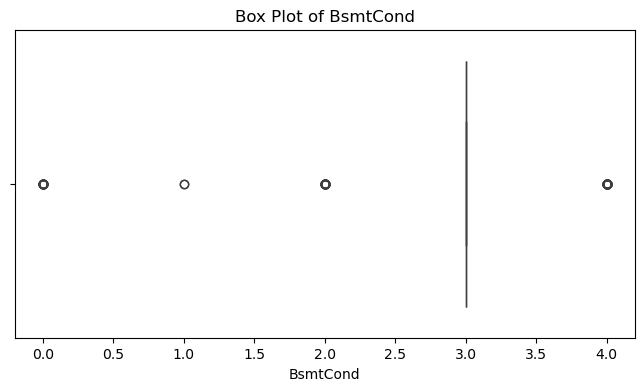

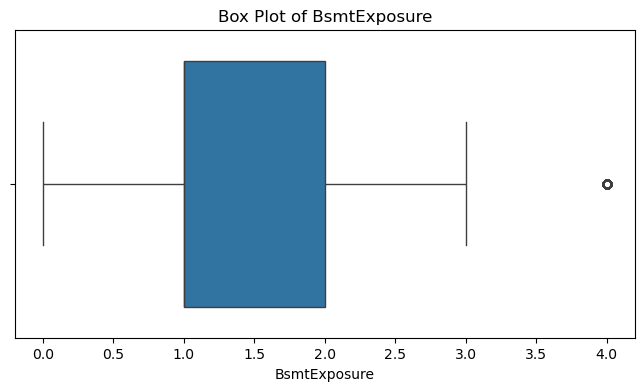

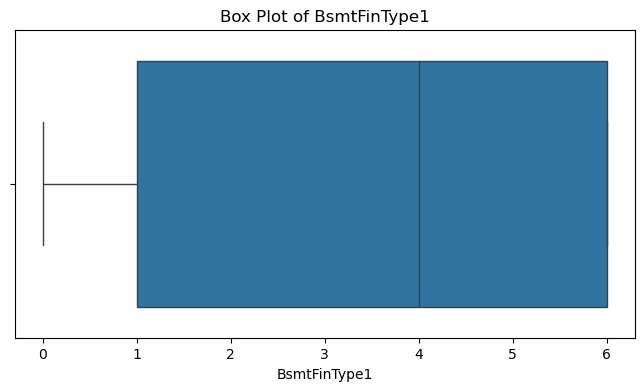

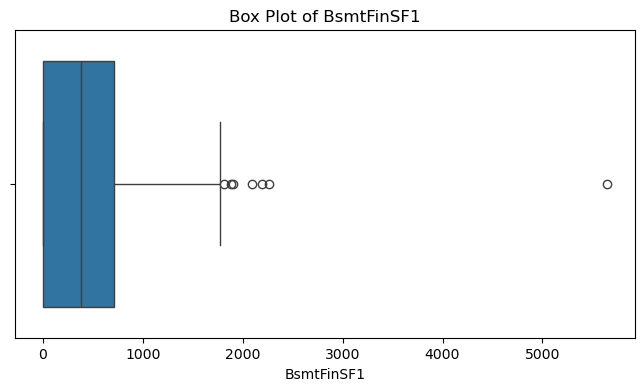

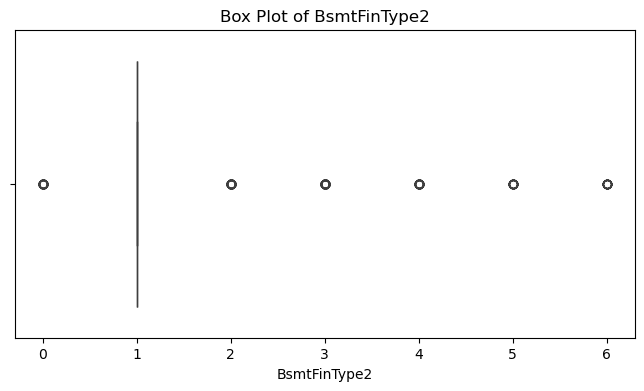

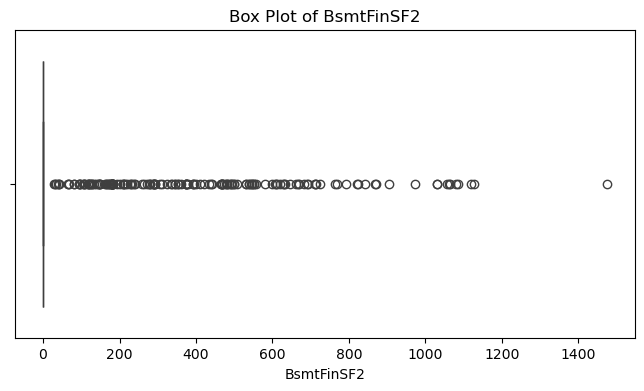

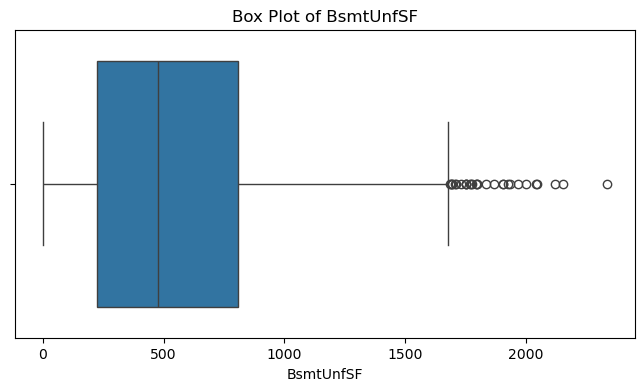

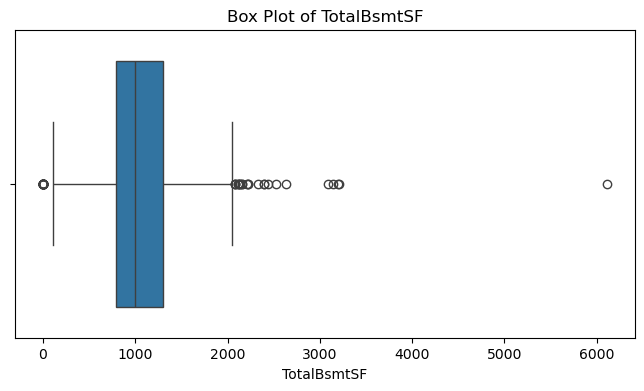

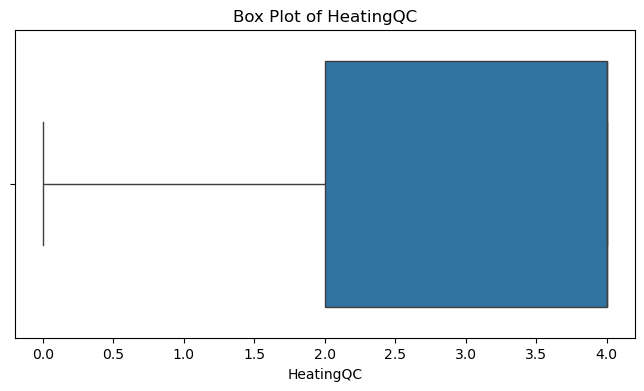

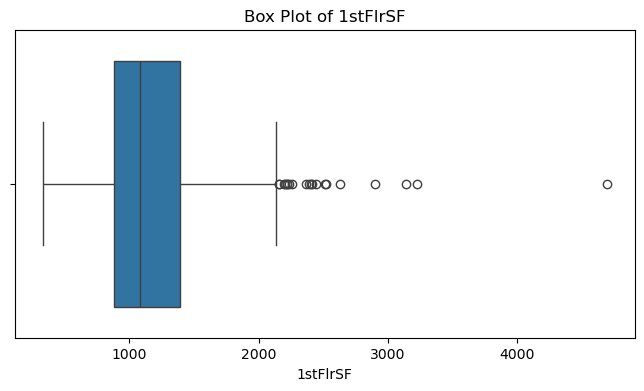

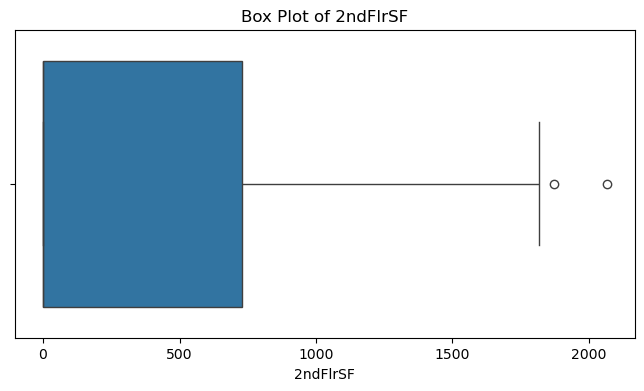

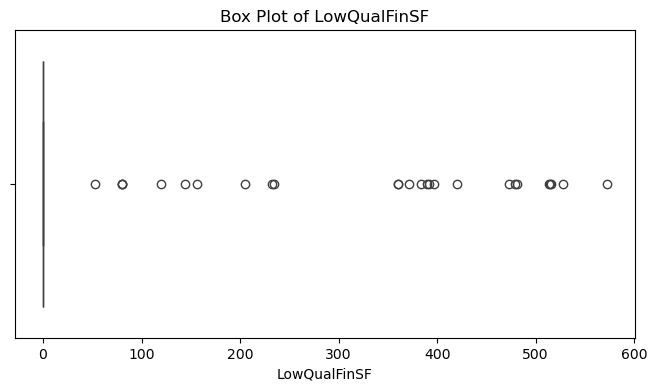

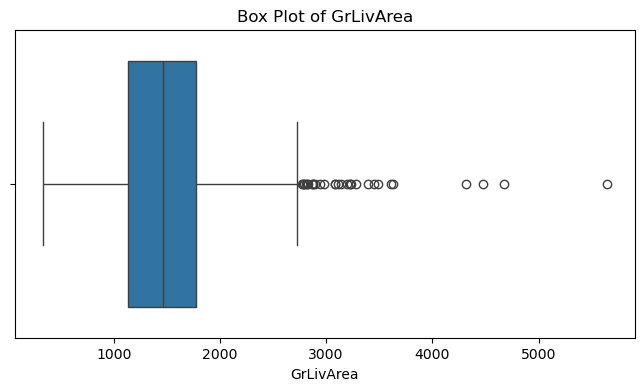

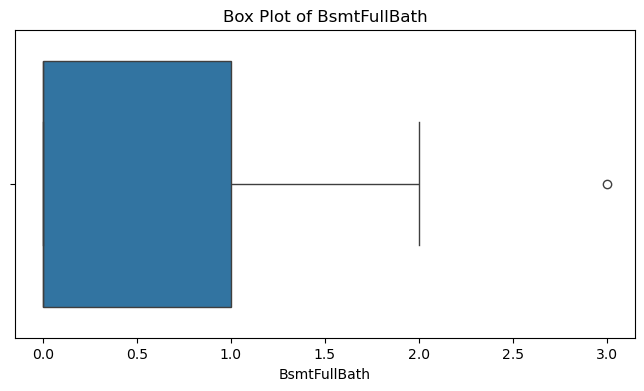

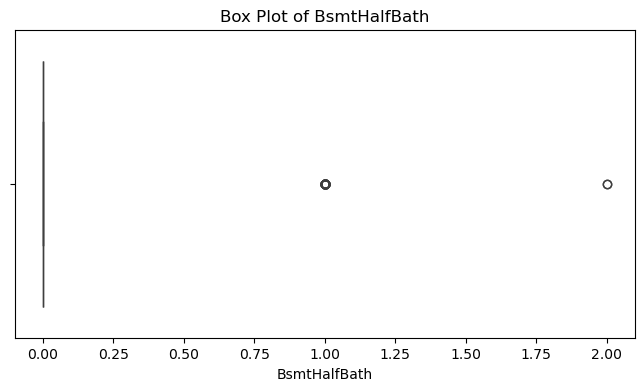

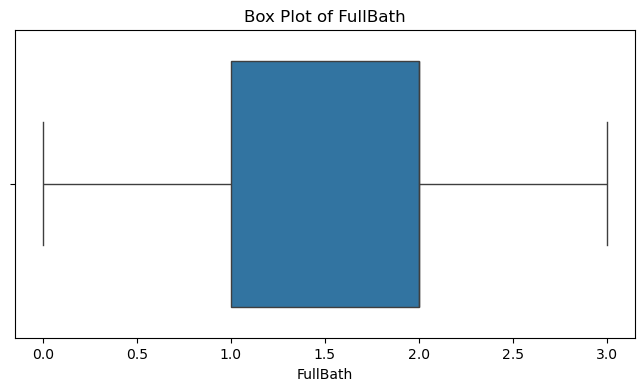

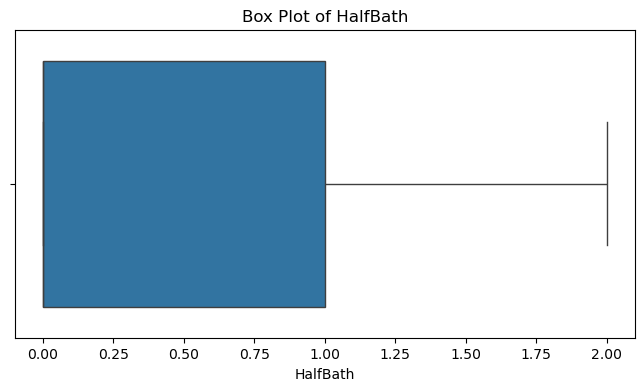

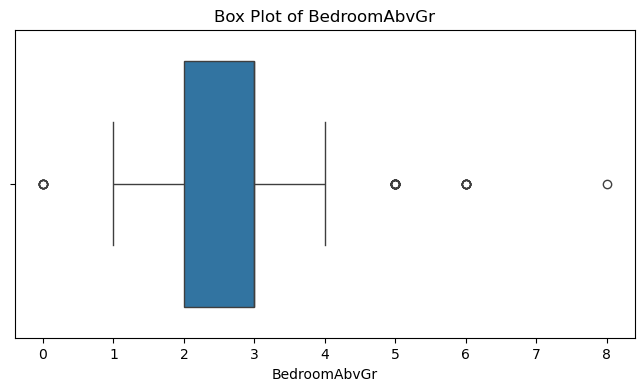

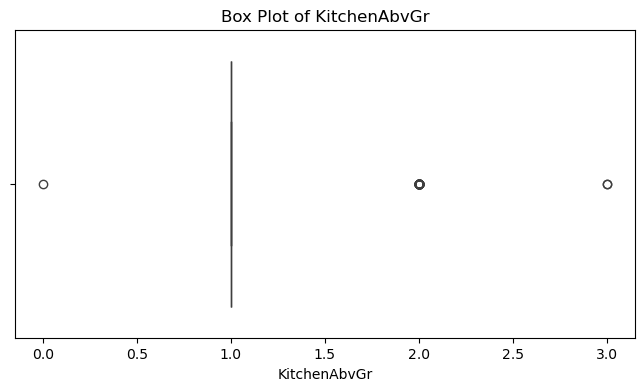

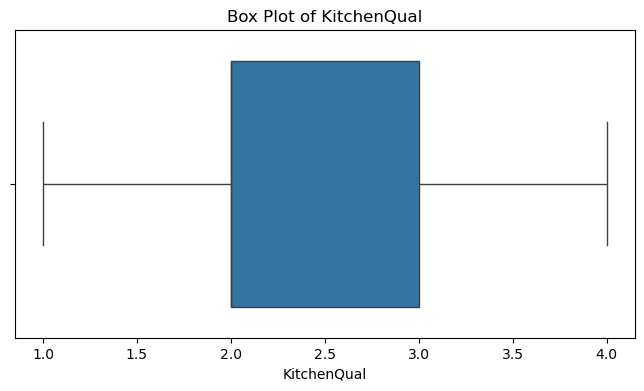

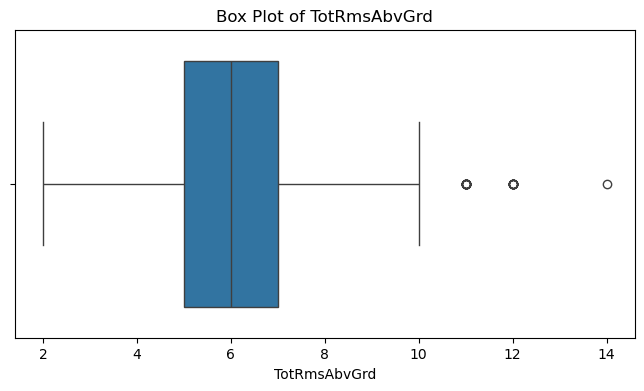

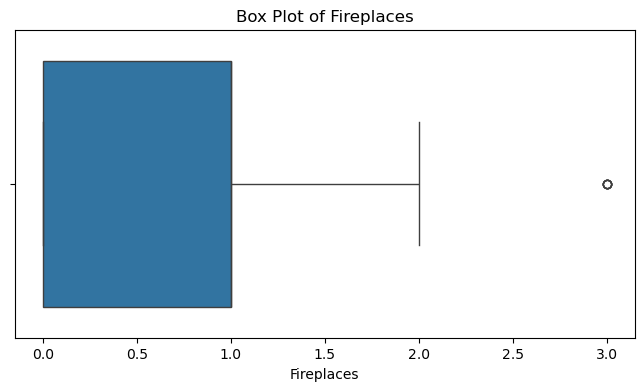

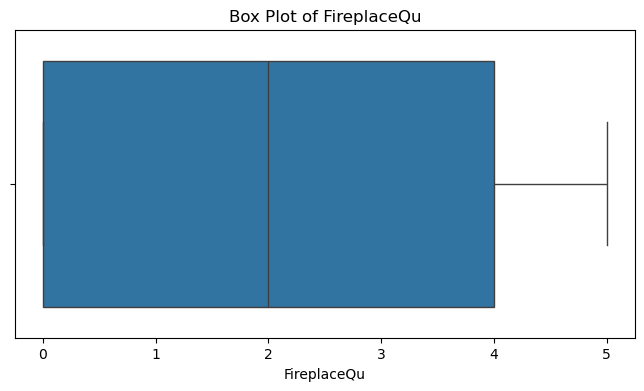

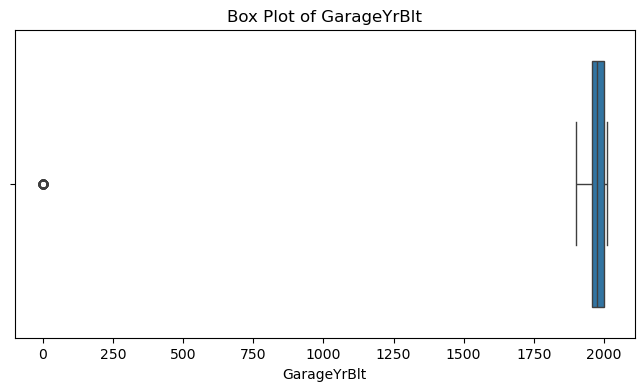

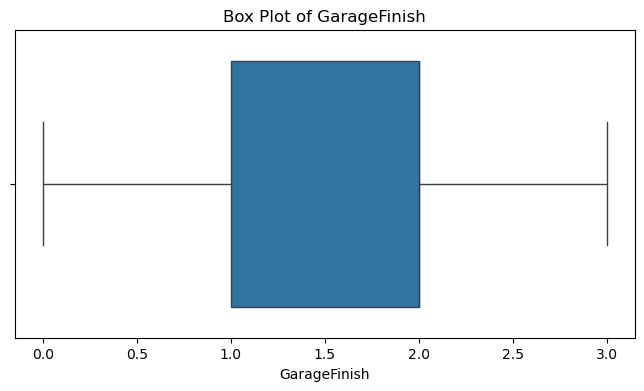

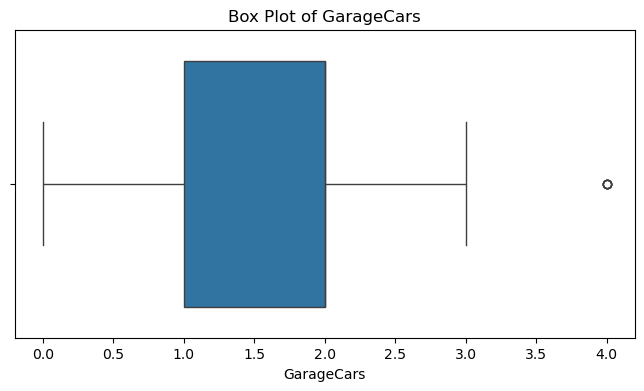

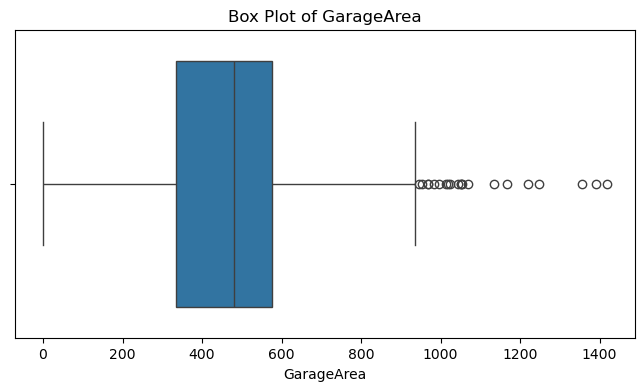

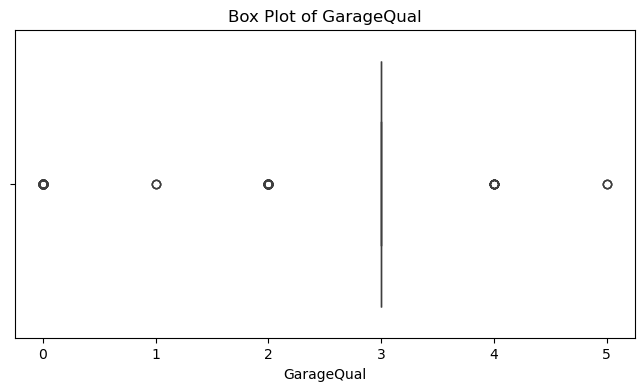

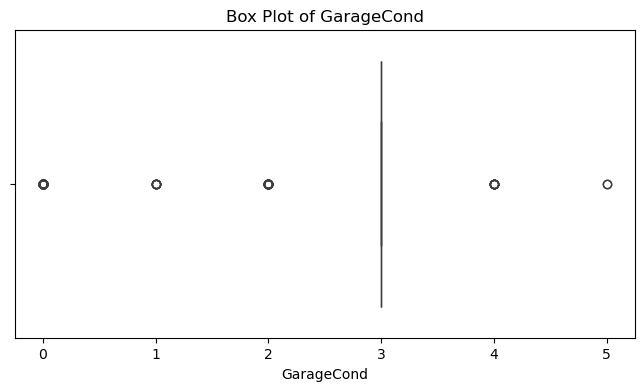

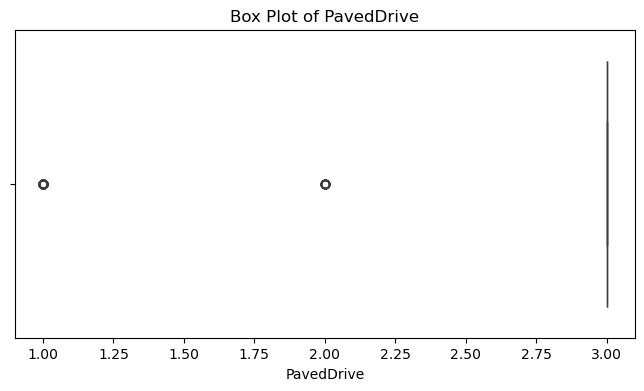

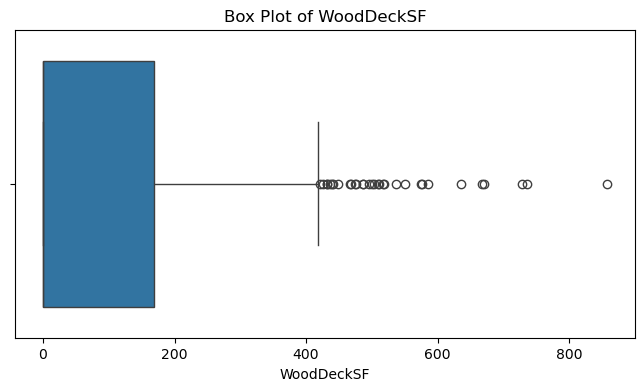

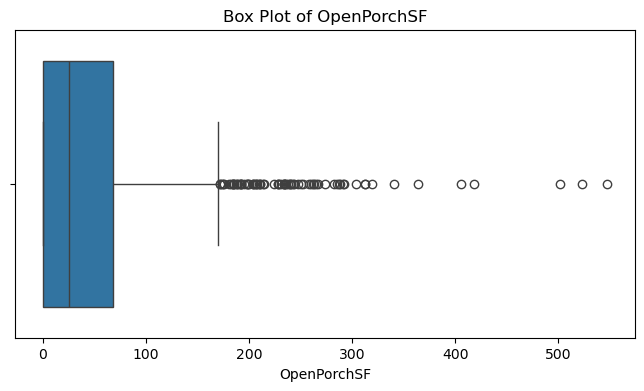

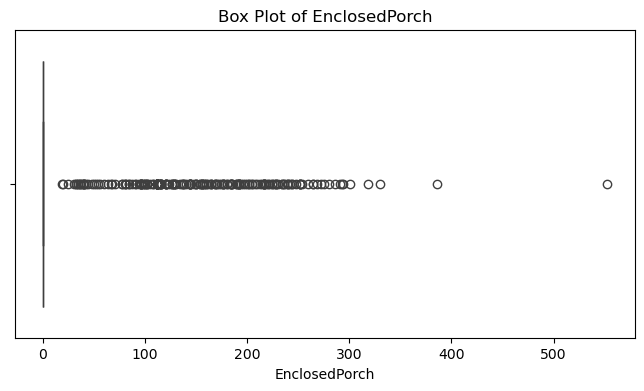

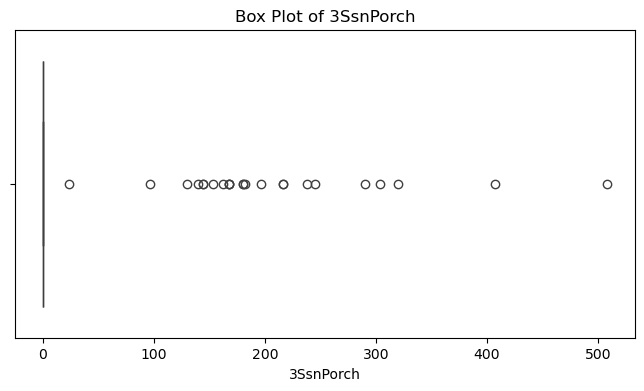

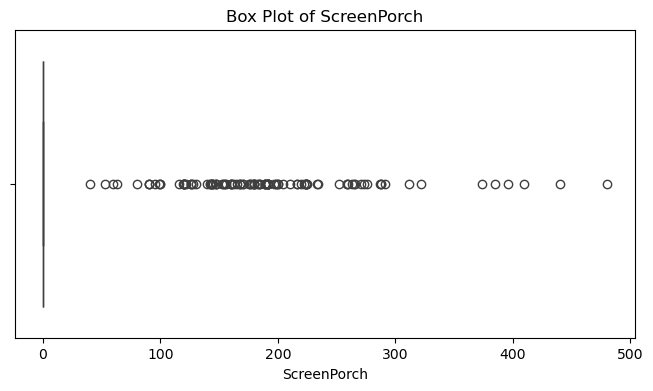

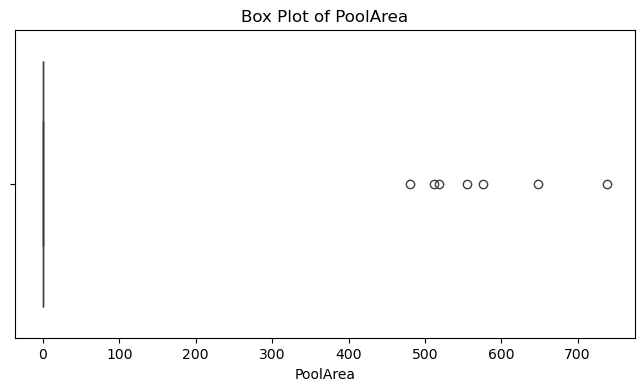

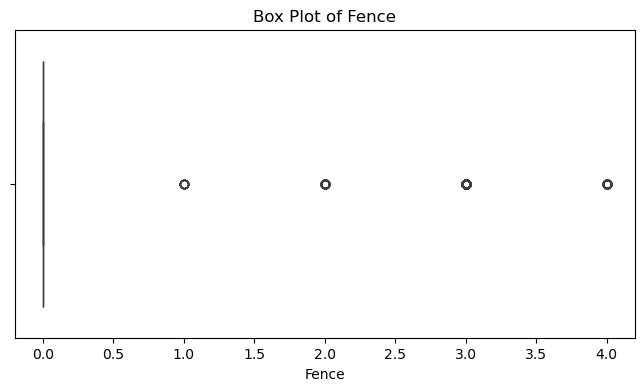

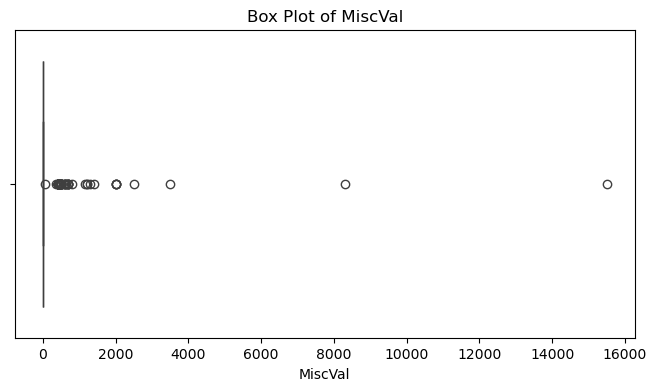

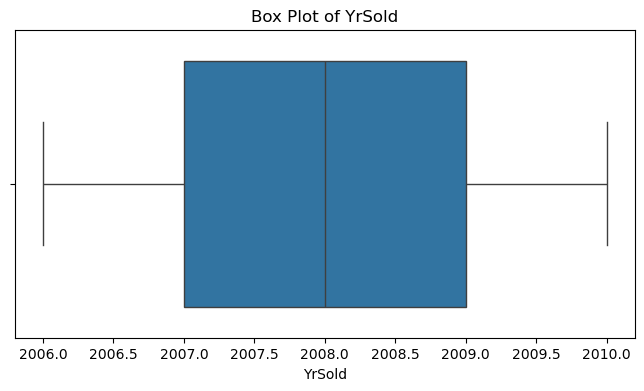

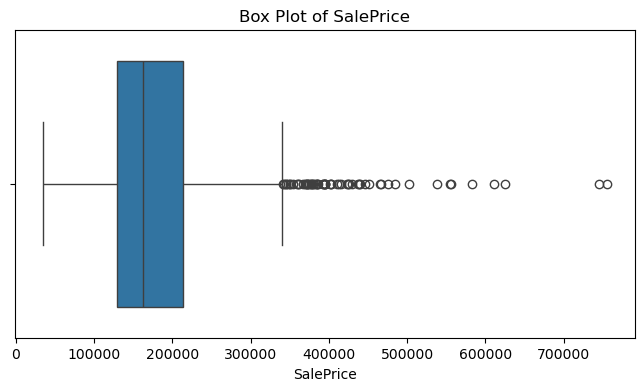

In [29]:
# Box plots for outlier detection
num_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

high_corr_features ['OverallQual', 'ExterQual', 'GrLivArea', 'KitchenQual', 'SalePrice']


<Figure size 1200x1200 with 0 Axes>

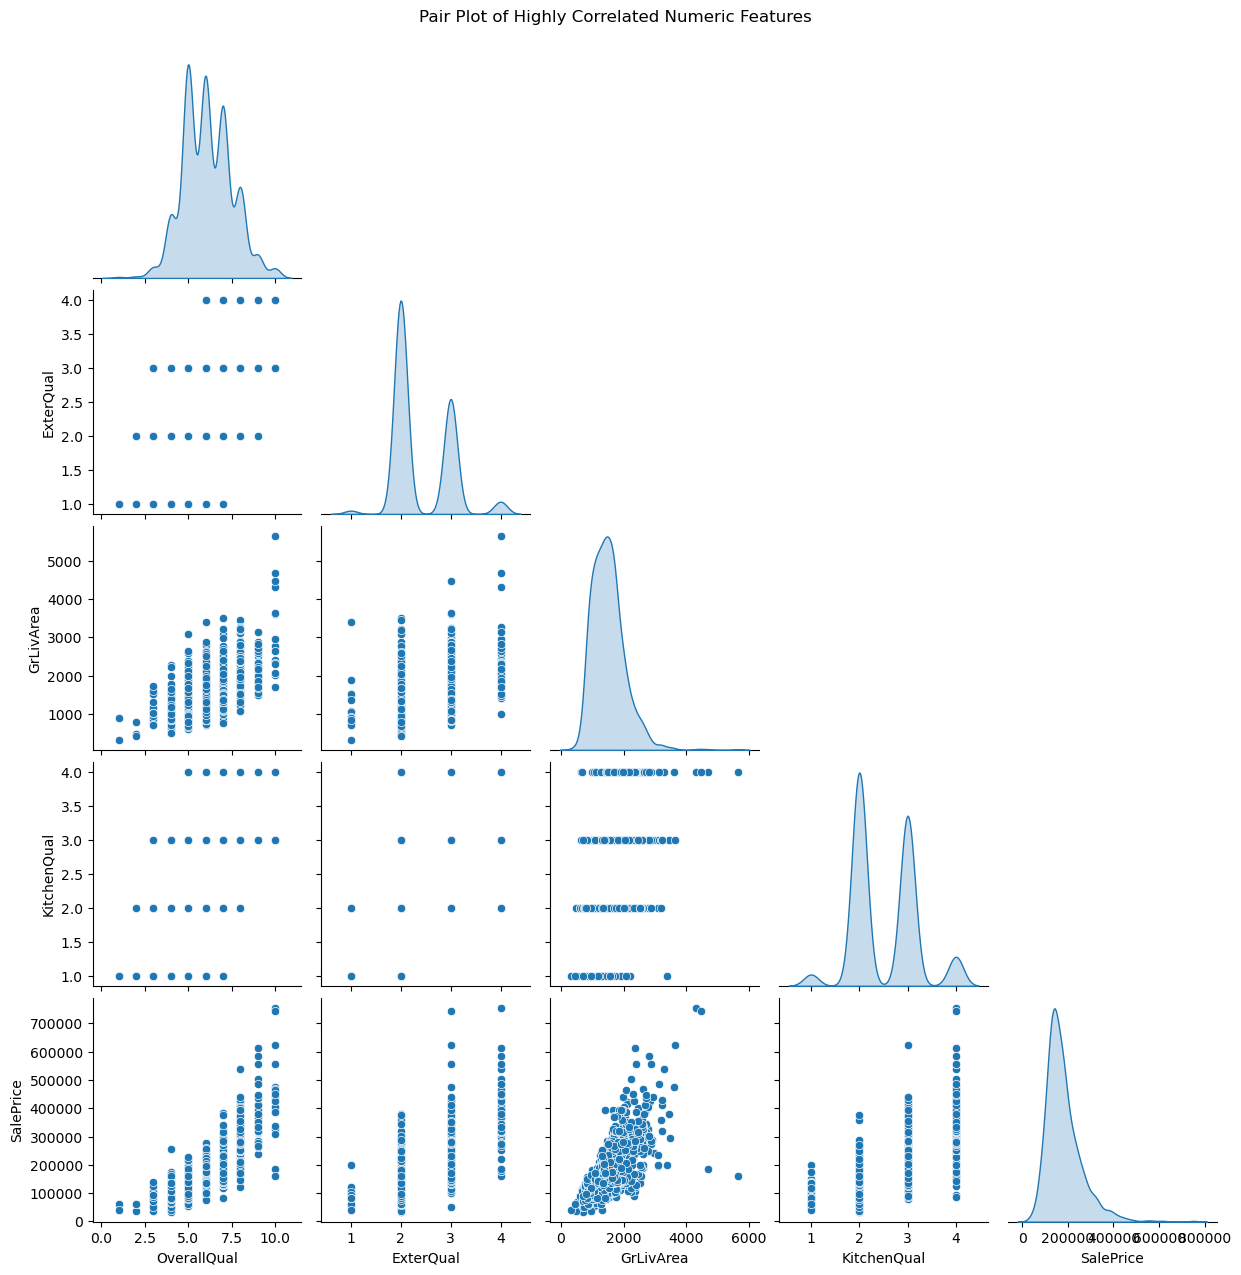

In [78]:
numerical_features = df.select_dtypes(include=['number']).columns
target_variable = 'SalePrice'
correlation_threshold = 0.65

# Calculate correlation with the target variable
correlation_with_target = df[numerical_features].corr()[target_variable].abs()

# Filter features based on correlation threshold
high_corr_features = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()
print('high_corr_features',high_corr_features)

# Ensure the target variable is in the filtered list
if target_variable not in high_corr_features:
    high_corr_features.append(target_variable)

# Create the pairplot
plt.figure(figsize=(12, 12))  # Adjust figure size as needed
sns.pairplot(df[high_corr_features], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Highly Correlated Numeric Features', y=1.02)
plt.show()

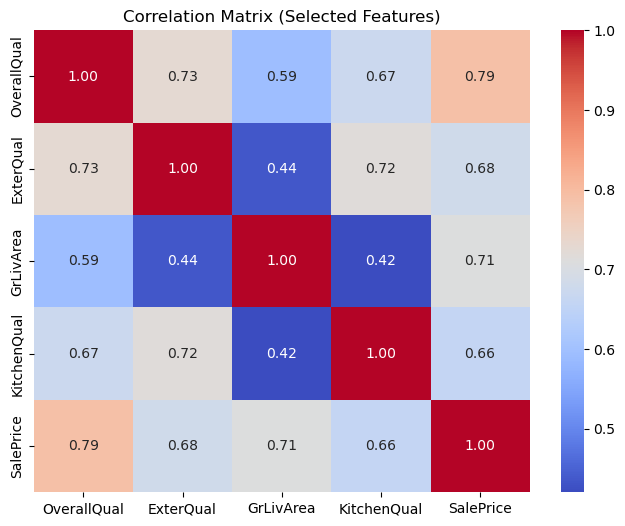

In [67]:
# Correlation matrix for specific columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[high_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Features)')
plt.show()

### Predictive Analysis


Linear Regression Performance:
Mean Absolute Error: 24689.932088756716
Mean Squared Error: 1114048676.0599654
R-squared Score: 0.7946300975173332

Decision Tree Performance:
Mean Absolute Error: 30014.95458251794
Mean Squared Error: 1774090922.8435977
R-squared Score: 0.6729542544690725


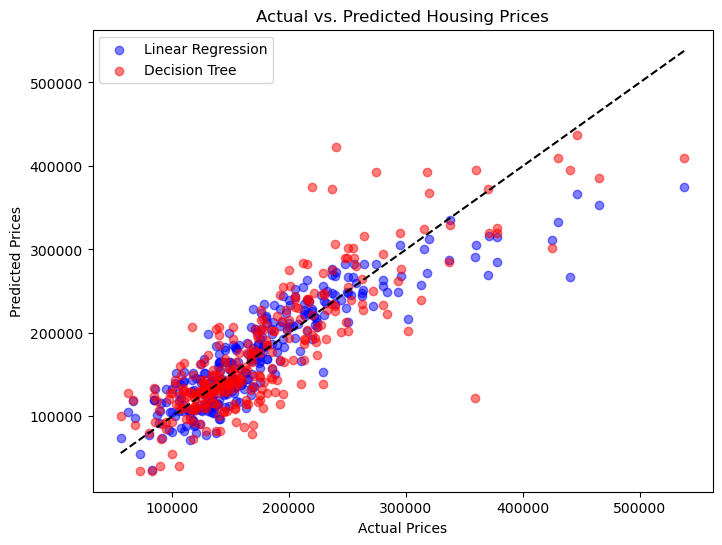

In [71]:
# Selecting features and target variable
data = df[high_corr_features].copy()
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
# Model Evaluation
def evaluate_model(y_test, predictions, model_name):
    print(f"\n{model_name} Performance:")
    print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, predictions))
    print("R-squared Score:", r2_score(y_test, predictions))

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")

# Visualizing Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, dt_predictions, alpha=0.5, label='Decision Tree', color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Housing Prices")
plt.legend()
plt.show()


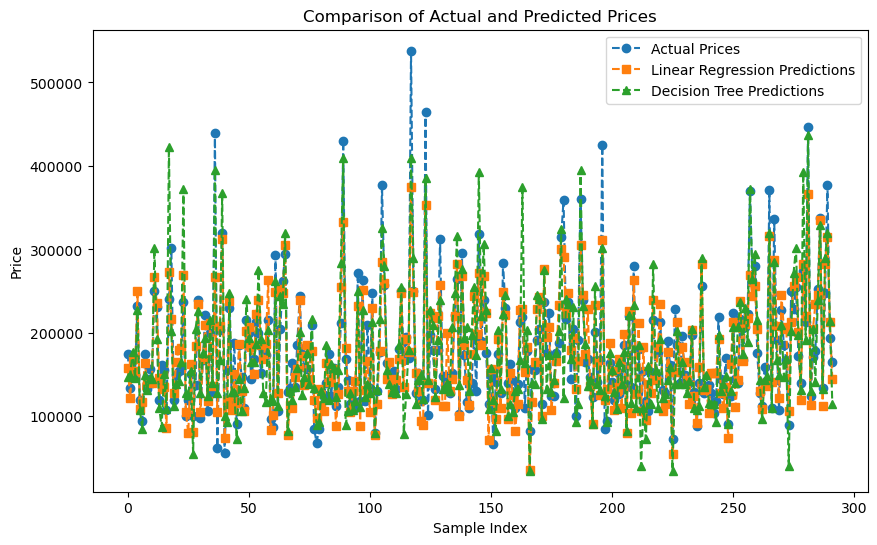

In [73]:
# Line plot comparing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', marker='o', linestyle='dashed')
plt.plot(lr_predictions, label='Linear Regression Predictions', marker='s', linestyle='dashed')
plt.plot(dt_predictions, label='Decision Tree Predictions', marker='^', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Comparison of Actual and Predicted Prices")
plt.legend()
plt.show()

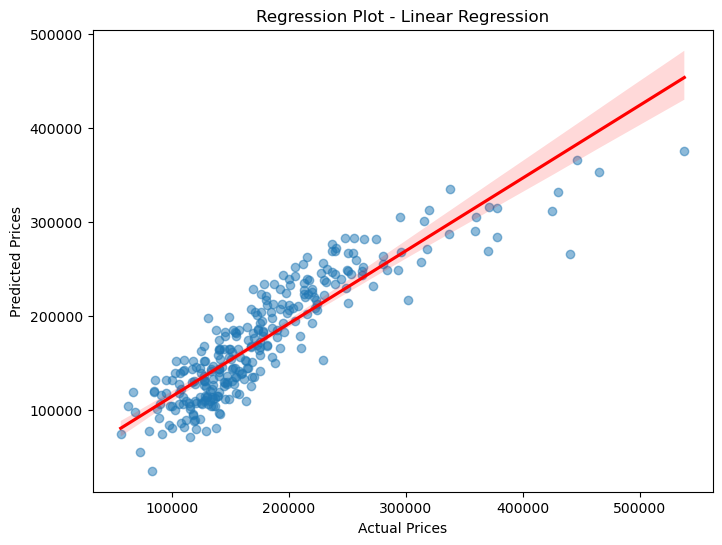

In [75]:
# Regression plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=lr_predictions, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Plot - Linear Regression")
plt.show()